In [3]:
#%matplotlib inline
import matplotlib.pyplot as plt

import keras
#from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D ,AveragePooling2D

import tensorflow as tf

import os
import pickle
import numpy as np


data = np.load('x_data_100_classes_5k.npy.zip')['x_data_100_classes_5k']
data = np.array(map(lambda x : np.reshape(x,(28,28,1)) , data))

classes = ['airplane','alarm clock','ambulance','angel','ant','anvil','apple','axe','banana','bandage','barn','baseball bat','baseball',
           'basket','basketball','bathtub','beach','bear','beard','bed','bee','belt','bicycle','binoculars','birthday cake','blueberry',
           'book','boomerang','bottlecap','bowtie','bracelet','brain','bread','broom','bulldozer','bus','bus','butterfly','cactus','cake',
           'calculator','calendar','camel','camera','campfire','candle','cannon','canoe','car','carrot','cello','computer',
           'cat','chandelier','clock','cloud','coffee cup','compass','cookie','couch','cow','crab','crayon','crocodile','crown',
           'cup','diamond','dog','dolphin','donut','dragon','dresser','drill','drums','duck','dumbbell','ear','elbow',
           'elephant','envelope','eraser','eye','eyeglasses','face','fan','feather','fence','finger','fire hydrant',
           'fireplace','firetruck','fish','flamingo','flashlight','flip flops','floor lamp','flower','flying saucer',
           'foot','fork']

#plt.imshow(data[9999]);plt.show()
#plt.imshow(data[10000]);plt.show()
y = np.zeros(500000 ,dtype = np.uint8)
label = 0
counter = 0
for i in range(len(data)):
    if classes[label] == 'Bus':
        y[i] = 35
    else:
        y[i] = label
    counter += 1
    if counter==5000:
        counter = 0
        label += 1
    
batch_size = 320
num_classes = 100
epochs = 50

x_train ,y_train = data[0::2],y[0::2]
x_test, y_test = data[1::2],y[1::2]
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


Inp0 = Input(shape=(28,28,1),name = 'Input_layer')
Inp = keras.layers.BatchNormalization()(Inp0)
#ConvBlock 01

conv01a = Conv2D(32, (3, 3), padding='same',activation = 'relu', input_shape=Inp.shape,name = 'Conv01_layerA')(Inp)
conv02a = Conv2D(32, (3, 3),activation = 'relu',name = 'Conv02_layerA')(conv01a)
maxpool_01a = MaxPooling2D(pool_size=(2, 2),name = 'MaxPool01_layerA')(conv02a)
drop01a = Dropout(0.25,name = 'Dropout01_layerA')(maxpool_01a)

conv01b = Conv2D(32, (3, 3), padding='same',activation = 'relu', input_shape=Inp.shape,name = 'Conv01_layerB')(Inp)
conv02b = Conv2D(32, (3, 3),activation = 'relu',name = 'Conv02_layerB')(conv01b)
avgpool_01b = AveragePooling2D(pool_size=(2, 2),name = 'AvgPool01_layerB')(conv02b)
drop01b = Dropout(0.25,name = 'Dropout01_layerB')(avgpool_01b)
drop01_p = keras.layers.concatenate([drop01a,drop01b])

#Convblock 02
drop01 = keras.layers.BatchNormalization()(drop01_p)
conv03a = Conv2D(64, (3, 3), padding='same',activation = 'relu',name = 'Conv03_layerA')(drop01)
conv04a = Conv2D(64, (3, 3),activation = 'relu',name = 'Conv04_layerA')(conv03a)
maxpool_02a = MaxPooling2D(pool_size=(2, 2),name = 'MaxPool02_layerA')(conv04a)
drop02a = Dropout(0.25,name = 'Dropout02_layerA')(maxpool_02a)

conv03b = Conv2D(64, (3, 3), padding='same',activation = 'relu',name = 'Conv03_layerB')(drop01)
conv04b = Conv2D(64, (3, 3),activation = 'relu',name = 'Conv04_layerB')(conv03b)
Avgpool_02b = AveragePooling2D(pool_size=(2, 2),name = 'AvgPool02_layerB')(conv04b)
drop02b = Dropout(0.25,name = 'Dropout02_layerB')(Avgpool_02b)

drop02_p = keras.layers.concatenate([drop02a,drop02b])
#ConvBLock 03
drop02 = keras.layers.BatchNormalization()(drop02_p)
conv05 = Conv2D(256, (3, 3),activation = 'relu',name = 'Conv05_layer')(drop02)
conv06 = Conv2D(256, (2, 2),activation = 'relu',name = 'Conv06_layer')(conv05)
drop03 = Dropout(0.25,name = 'Dropout03_layer')(conv06)

# Fully Connected Dense block
x = Flatten(name = 'Flatten_layer')(drop03)
x = Dense(512, name = 'Dense_layer')(x)
x = Activation('relu',name='Dense_Relu') (x)
x = Dropout(0.5,name = 'Dropout04_layer')(x)
logits_layer = Dense(num_classes, name= 'logits_layer')(x)
output = Activation('softmax',name = 'Sofftmax_layer')(logits_layer)

# Define model inputs and output
model = Model(Inp0, output)
model.summary()

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.00003, decay=1e-4) #decays by two orders of magnitude

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


('x_train shape:', (250000, 28, 28, 1))
('y_train shape:', (250000,))
(250000, 'train samples')
(250000, 'test samples')
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
Input_layer (InputLayer)         (None, 28, 28, 1)     0                                            
____________________________________________________________________________________________________
batch_normalization_1 (BatchNorm (None, 28, 28, 1)     4           Input_layer[0][0]                
____________________________________________________________________________________________________
Conv01_layerA (Conv2D)           (None, 28, 28, 32)    320         batch_normalization_1[0][0]      
____________________________________________________________________________________________________
Conv01_layerB (Conv2D)           (None, 28, 28, 32)    320         batc

In [ ]:
#f, ax = plt.subplots(20,20,figsize=(40,40))
counter= 0
for i in range(356,500000,5000//4):
    #ax[counter//20,counter%20].imshow(data[i,:,:,0])
    counter += 1
#plt.imshow(data[10000]);plt.show()
#plt.show()

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


In [ ]:
model.load_weights('./weight2.h5')

In [5]:
hist = model.fit(x_train[0::100], y_train[0::100],batch_size,
                           5,verbose = 1,
                           validation_data=(x_test[0::100], y_test[0::100]))

Train on 2500 samples, validate on 2500 samples
Epoch 1/5
2500/2500 [==============================] - 18s - loss: 0.5349 - acc: 0.8388 - val_loss: 0.7947 - val_acc: 0.8220
Epoch 2/5
1600/2500 [==================>...........] - ETA: 4s - loss: 0.5200 - acc: 0.8456 

KeyboardInterrupt: 

In [6]:
pred = model.predict(x_test[::100],1000)

In [7]:
pred2 = map( lambda x: x.argsort()[-5:],pred)


In [ ]:
classes = ['airplane','alarm clock','ambulance','angel','ant','anvil','apple','axe','banana','bandage','barn','baseball bat','baseball',
           'basket','basketball','bathtub','beach','bear','beard','bed','bee','belt','bicycle','binoculars','birthday cake','blueberry',
           'book','boomerang','bottlecap','bowtie','bracelet','brain','bread','broom','bulldozer','bus','bus','butterfly','cactus','cake',
           'calculator','calendar','camel','camera','campfire','candle','cannon','canoe','car','carrot','cello','computer',
           'cat','chandelier','clock','cloud','coffee cup','compass','cookie','couch','cow','crab','crayon','crocodile','crown',
           'cup','diamond','dog','dolphin','donut','dragon','dresser','drill','drums','duck','dumbbell','ear','elbow',
           'elephant','envelope','eraser','eye','eyeglasses','face','fan','feather','fence','finger','fire hydrant',
           'fireplace','firetruck','fish','flamingo','flashlight','flip flops','floor lamp','flower','flying saucer',
           'foot','fork']

# THE INCORRECT ONES

[9.9753941e-11, 3.0432185e-10, 1.0872356e-09, 1.2198452e-09, 1.0] ['cake', 'birthday cake', 'cactus', 'finger', 'crown'] campfire


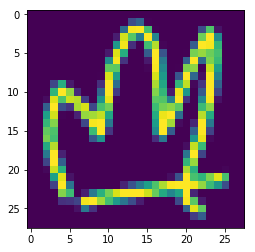

[0.020986645, 0.055320505, 0.077072509, 0.10263304, 0.659051] ['feather', 'fan', 'fireplace', 'chandelier', 'campfire'] drums


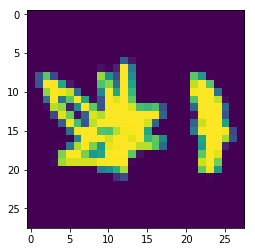

[0.01760222, 0.033875141, 0.11587348, 0.12587151, 0.67928529] ['blueberry', 'cookie', 'compass', 'face', 'clock'] dumbbell


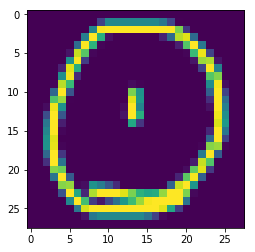

[0.03028691, 0.041453201, 0.062703289, 0.063300155, 0.080865033] ['fireplace', 'crown', 'fence', 'campfire', 'beach'] envelope


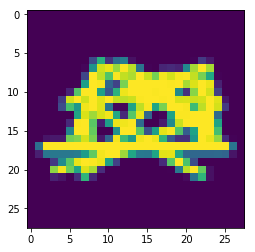

[0.013924156, 0.023024585, 0.13389282, 0.25221148, 0.49594873] ['couch', 'basketball', 'basket', 'bee', 'drums'] envelope


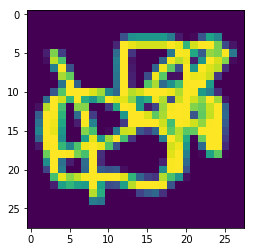

[0.018127212, 0.037512884, 0.0435431, 0.050659996, 0.5679844] ['bracelet', 'eraser', 'barn', 'bottlecap', 'bread'] floor lamp


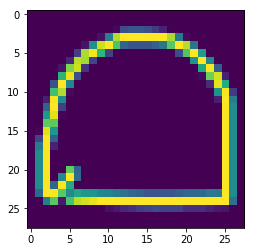

In [8]:
# plot those that are incorrect
for i in range(1900,500000/2,2000):
    if np.argmax(y_test[i]) not in pred2[i//100] :
        plt.imshow(x_test[i,:,:,0]);
        print sorted(pred[i//100])[-5:],map( lambda x : classes[x],pred2[i//100]),classes[np.argmax(y_test[i])]
        plt.show()

# THE CORRECT ONES

[4.1776482e-05, 0.00081796915, 0.0065106219, 0.01382469, 0.97878635] ['fish', 'crocodile', 'dragon', 'dolphin', 'airplane'] airplane


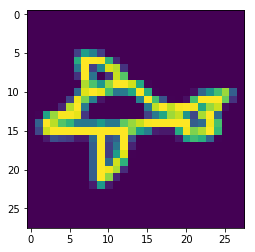

[0.00011036717, 0.00022544338, 0.00066107232, 0.0035287279, 0.99526608] ['dog', 'face', 'bear', 'drums', 'alarm clock'] alarm clock


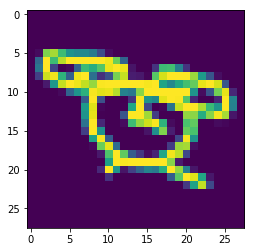

[0.0032208825, 0.0082819862, 0.014552482, 0.015351148, 0.95789945] ['brain', 'car', 'bus', 'bus', 'ambulance'] ambulance


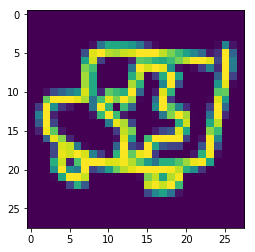

[2.4094191e-10, 2.3949145e-09, 1.4722151e-08, 1.8702492e-08, 1.0] ['flamingo', 'drums', 'fan', 'bear', 'angel'] angel


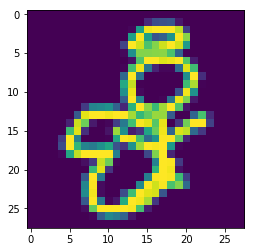

[4.4182892e-14, 5.3665048e-13, 6.0272161e-12, 8.2270475e-12, 1.0] ['fan', 'bee', 'butterfly', 'bear', 'angel'] angel


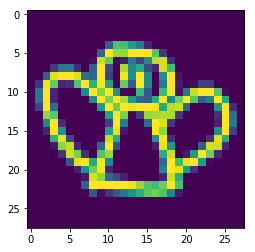

[8.4249462e-11, 1.7017951e-10, 8.2102245e-09, 1.5000211e-08, 1.0] ['dog', 'eyeglasses', 'drums', 'blueberry', 'ant'] ant


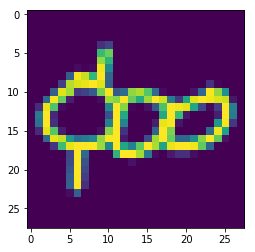

[4.435563e-11, 1.5977099e-10, 1.7050684e-08, 7.2032392e-08, 0.99999988] ['cup', 'bread', 'drill', 'cannon', 'anvil'] anvil


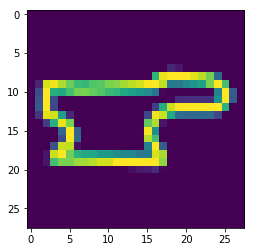

[8.0931897e-14, 7.1987576e-13, 2.4303526e-12, 1.033989e-08, 1.0] ['cake', 'alarm clock', 'birthday cake', 'blueberry', 'apple'] apple


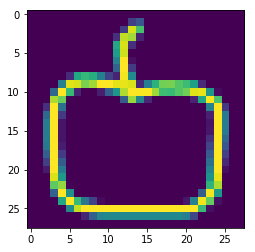

[4.3738436e-17, 6.4056999e-17, 2.1310904e-15, 5.4030834e-15, 1.0] ['eraser', 'crayon', 'drill', 'fork', 'axe'] axe


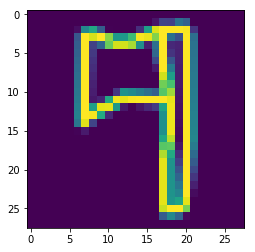

[0.0064107357, 0.0064630001, 0.018489815, 0.11061192, 0.8361814] ['drill', 'bed', 'floor lamp', 'bottlecap', 'axe'] axe


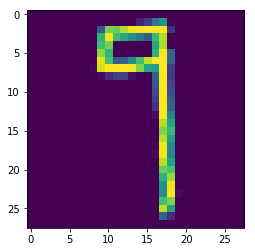

[5.5001169e-06, 0.00012282969, 0.00084047159, 0.30202997, 0.69699115] ['belt', 'boomerang', 'bathtub', 'canoe', 'banana'] banana


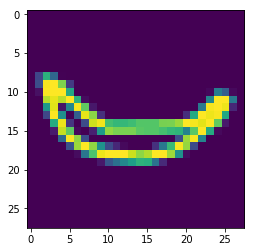

[7.117254e-06, 0.00822182, 0.11078139, 0.26292327, 0.6180622] ['bracelet', 'bowtie', 'flashlight', 'bandage', 'belt'] bandage


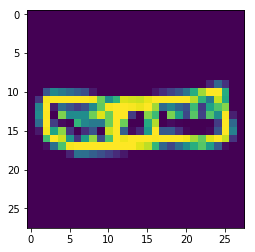

[0.003772463, 0.0046417136, 0.0064113769, 0.0072169858, 0.9539423] ['fence', 'fireplace', 'belt', 'chandelier', 'barn'] barn


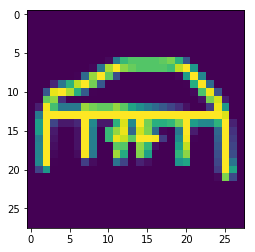

[3.7573354e-05, 0.00011290399, 0.029469218, 0.45861441, 0.51169062] ['boomerang', 'cannon', 'fish', 'dolphin', 'baseball bat'] baseball bat


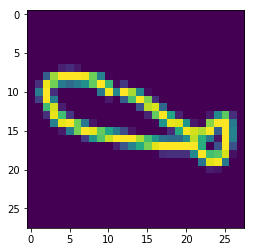

[4.5435645e-08, 1.2006369e-07, 1.1866179e-06, 2.2776276e-06, 0.9999963] ['ear', 'boomerang', 'banana', 'baseball', 'baseball bat'] baseball bat


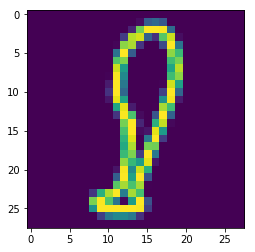

[2.7999922e-13, 2.9945482e-13, 2.1382559e-12, 0.004143496, 0.99585646] ['basket', 'compass', 'brain', 'basketball', 'baseball'] baseball


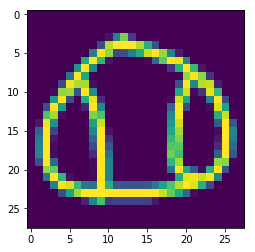

[0.011748432, 0.029148616, 0.037464485, 0.36673188, 0.45325074] ['fireplace', 'calendar', 'calculator', 'beard', 'basket'] basket


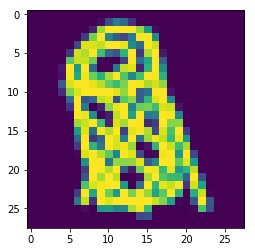

[0.015459855, 0.017709654, 0.14096126, 0.3121793, 0.45542249] ['donut', 'brain', 'fan', 'baseball', 'basketball'] basketball


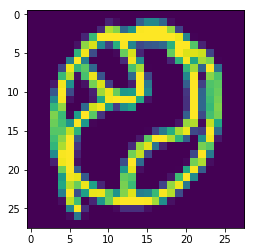

[7.1136164e-05, 0.00011149212, 0.00038416262, 0.00052601524, 0.99890208] ['birthday cake', 'couch', 'cake', 'bottlecap', 'bathtub'] bathtub


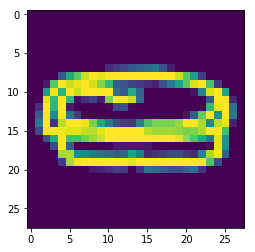

[6.9812267e-09, 1.3787223e-07, 3.5837883e-07, 1.8923394e-06, 0.99999762] ['bottlecap', 'cake', 'birthday cake', 'canoe', 'bathtub'] bathtub


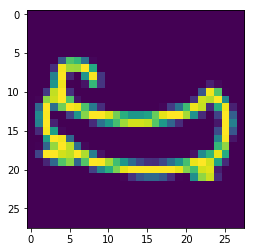

[0.0006506638, 0.0010228094, 0.0021144571, 0.3095907, 0.68147022] ['canoe', 'dragon', 'belt', 'beach', 'crocodile'] beach


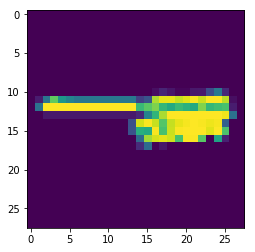

[1.0041749e-09, 1.0187755e-08, 3.0012103e-07, 3.3980029e-07, 0.99999928] ['elephant', 'alarm clock', 'dog', 'cat', 'bear'] bear


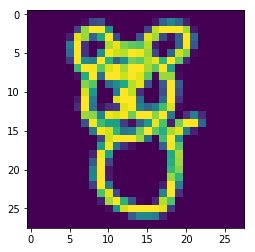

[1.724468e-07, 3.2137152e-07, 3.373371e-07, 5.9604014e-07, 0.99999845] ['belt', 'bracelet', 'bottlecap', 'basket', 'beard'] beard


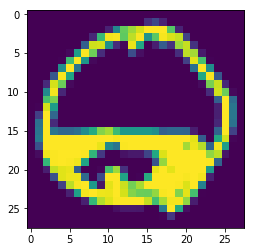

[4.7780512e-05, 0.00024133906, 0.00094968762, 0.0014575915, 0.99711061] ['birthday cake', 'dumbbell', 'drill', 'bathtub', 'bed'] bed


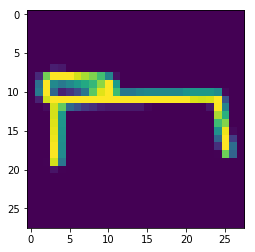

[0.00083047122, 0.0011401428, 0.0036090303, 0.01454675, 0.97878772] ['eraser', 'fence', 'couch', 'bathtub', 'bed'] bed


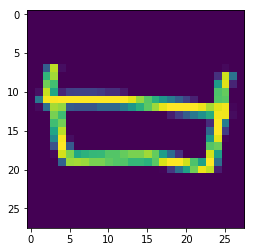

[1.8845016e-10, 1.4730887e-07, 2.6028266e-07, 9.9325873e-05, 0.99990034] ['baseball', 'basketball', 'cello', 'butterfly', 'bee'] bee


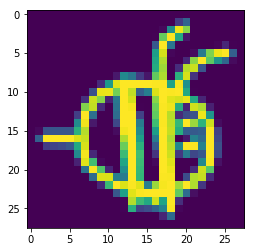

[1.3443417e-06, 2.1934125e-05, 2.889815e-05, 0.06896852, 0.93097746] ['bread', 'flashlight', 'eraser', 'belt', 'bandage'] belt


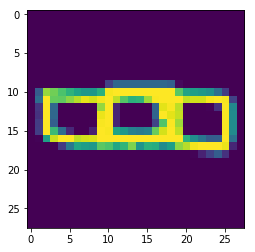

[0.0025528315, 0.0044435812, 0.01643187, 0.043537445, 0.92770684] ['firetruck', 'eyeglasses', 'car', 'cannon', 'bicycle'] bicycle


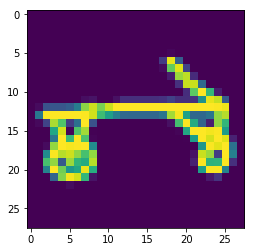

[6.2371313e-05, 0.0001547366, 0.00026336146, 0.0015737171, 0.9976694] ['basketball', 'baseball', 'flip flops', 'dumbbell', 'binoculars'] binoculars


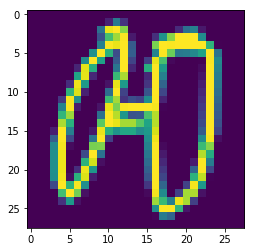

[0.024933714, 0.037385166, 0.076317608, 0.14234325, 0.53324002] ['bowtie', 'brain', 'eyeglasses', 'bandage', 'binoculars'] binoculars


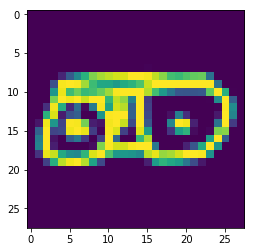

[1.9686413e-09, 1.0222614e-08, 4.8175998e-08, 0.46357796, 0.53642195] ['couch', 'bathtub', 'chandelier', 'cake', 'birthday cake'] birthday cake


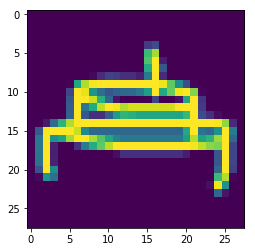

[0.0048225201, 0.0060269833, 0.0092711626, 0.049079444, 0.92915475] ['alarm clock', 'bear', 'bracelet', 'apple', 'blueberry'] blueberry


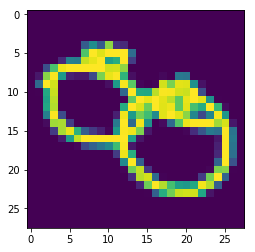

[1.2426359e-08, 3.3177258e-07, 6.3171564e-07, 1.3688915e-06, 0.99999762] ['calendar', 'eraser', 'dresser', 'bowtie', 'book'] book


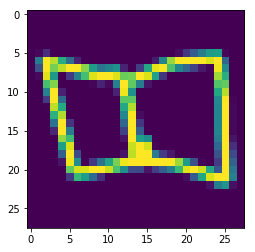

[0.00092493137, 0.00093340263, 0.0020257654, 0.0075492035, 0.98807842] ['banana', 'drill', 'crayon', 'boomerang', 'axe'] boomerang


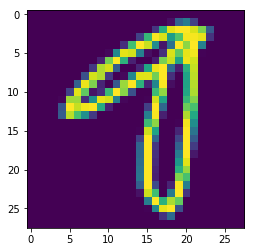

[3.5146761e-07, 0.00010652219, 0.0027891814, 0.035421968, 0.9616819] ['feather', 'elbow', 'ear', 'banana', 'boomerang'] boomerang


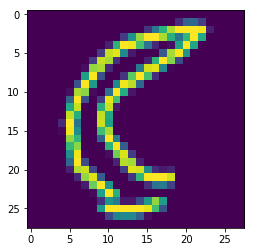

[0.051374301, 0.14115994, 0.15034068, 0.18827134, 0.24187294] ['crayon', 'belt', 'bottlecap', 'eraser', 'bandage'] bottlecap


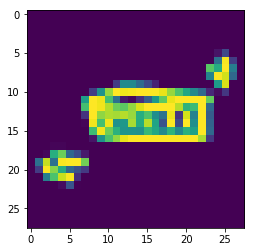

[1.4894424e-17, 5.5901329e-17, 1.1407547e-16, 4.0802971e-07, 0.99999964] ['flashlight', 'binoculars', 'eyeglasses', 'fish', 'bowtie'] bowtie


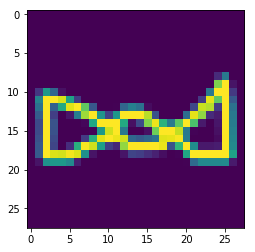

[4.902716e-10, 1.7674909e-08, 5.8407664e-08, 0.001518738, 0.99848121] ['beard', 'belt', 'blueberry', 'bottlecap', 'bracelet'] bracelet


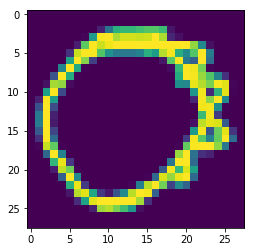

[0.025868045, 0.056359045, 0.16797572, 0.1746532, 0.32480413] ['car', 'couch', 'bus', 'bus', 'brain'] brain


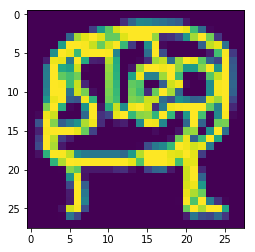

[2.5473944e-06, 3.6683948e-06, 9.5048981e-06, 2.3392629e-05, 0.99995351] ['compass', 'donut', 'fan', 'cookie', 'brain'] brain


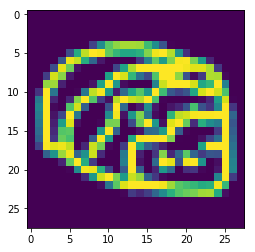

[5.0671303e-14, 7.8883447e-14, 4.0670229e-13, 4.5725745e-12, 1.0] ['camel', 'bear', 'cup', 'cloud', 'bread'] bread


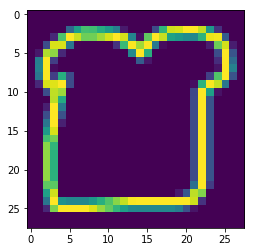

[0.0013270373, 0.01448045, 0.096291617, 0.28817829, 0.59928203] ['finger', 'fork', 'crayon', 'baseball bat', 'broom'] broom


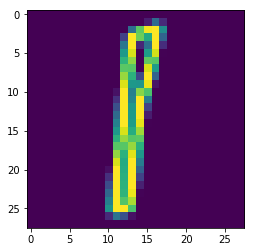

[3.5471756e-05, 5.8249363e-05, 7.1081835e-05, 0.00019980197, 0.9995327] ['car', 'firetruck', 'elephant', 'ambulance', 'bulldozer'] bulldozer


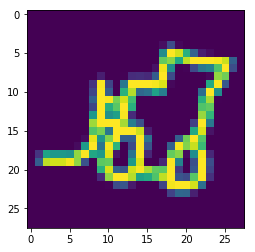

[2.9426023e-05, 0.0052879937, 0.093017846, 0.44834581, 0.45328155] ['car', 'ambulance', 'firetruck', 'bus', 'bus'] bus


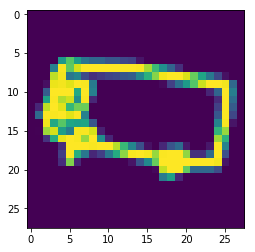

[0.0019183548, 0.0025021497, 0.072366752, 0.45571163, 0.46748495] ['car', 'ambulance', 'firetruck', 'bus', 'bus'] bus


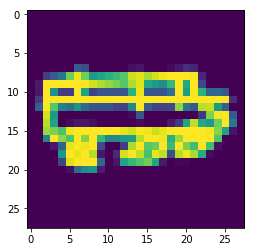

[0.00024240653, 0.00044893051, 0.0015047424, 0.49821058, 0.49958703] ['car', 'ambulance', 'firetruck', 'bus', 'bus'] bus


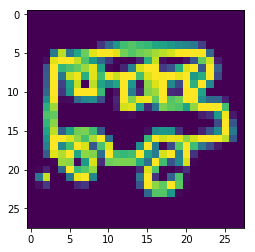

[1.6719702e-17, 5.0911577e-17, 1.2293034e-15, 2.2192657e-15, 1.0] ['elephant', 'binoculars', 'bee', 'bowtie', 'butterfly'] butterfly


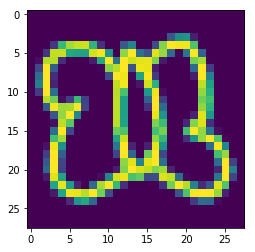

[5.4190821e-22, 8.2435298e-22, 3.0058291e-19, 3.2543751e-15, 1.0] ['chandelier', 'fork', 'fire hydrant', 'finger', 'cactus'] cactus


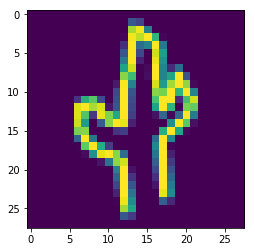

[5.0687705e-15, 2.4332451e-13, 3.1650661e-11, 0.29657188, 0.70342809] ['cup', 'candle', 'coffee cup', 'birthday cake', 'cake'] cake


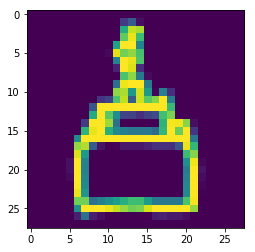

[7.8884932e-19, 4.3398573e-17, 7.7328556e-17, 0.20691313, 0.79308683] ['dresser', 'bathtub', 'coffee cup', 'birthday cake', 'cake'] cake


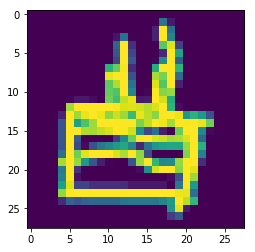

[6.3231769e-06, 2.5134559e-05, 2.8212096e-05, 0.17212939, 0.82778943] ['computer', 'dresser', 'book', 'calendar', 'calculator'] calculator


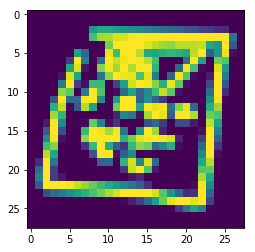

[1.3111583e-05, 5.8588459e-05, 0.00016831794, 0.0024243298, 0.99727088] ['alarm clock', 'cake', 'dresser', 'calculator', 'calendar'] calendar


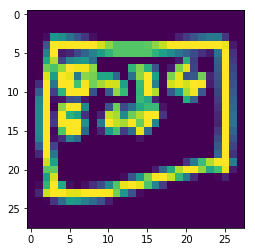

[8.6589104e-08, 2.7586381e-07, 2.9092269e-07, 3.8908377e-07, 0.99999881] ['dragon', 'elephant', 'cactus', 'dog', 'camel'] camel


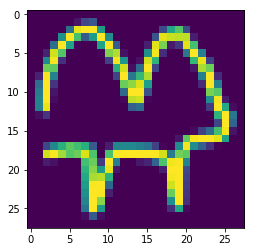

[1.106134e-17, 5.2605087e-17, 1.4294637e-16, 1.1732421e-15, 1.0] ['birthday cake', 'alarm clock', 'coffee cup', 'ambulance', 'camera'] camera


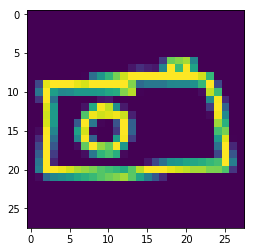

[3.988431e-07, 4.7327671e-07, 1.3028715e-06, 1.6413485e-06, 0.99999487] ['bandage', 'bread', 'envelope', 'alarm clock', 'camera'] camera


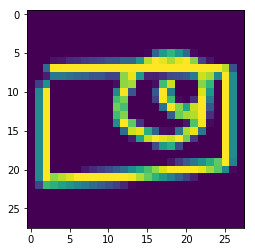

[4.5813292e-20, 9.2664087e-20, 5.3662427e-19, 3.3075556e-14, 1.0] ['bottlecap', 'fire hydrant', 'birthday cake', 'crayon', 'candle'] candle


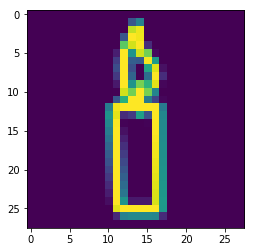

[1.1379442e-05, 1.5088975e-05, 2.6944708e-05, 0.0033939031, 0.9965167] ['bus', 'dog', 'cow', 'firetruck', 'cannon'] cannon


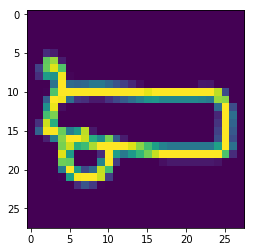

[1.5758658e-05, 4.2995885e-05, 0.027305089, 0.081245169, 0.89130348] ['envelope', 'boomerang', 'banana', 'bathtub', 'canoe'] canoe


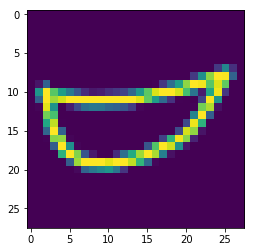

[4.2398911e-09, 7.3712738e-09, 0.00010570369, 0.00011527749, 0.99977905] ['eraser', 'boomerang', 'bathtub', 'banana', 'canoe'] canoe


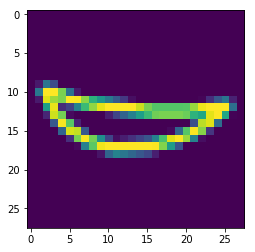

[7.3408764e-08, 1.0058237e-07, 6.9193434e-06, 7.4719537e-06, 0.99998534] ['firetruck', 'ambulance', 'bus', 'bus', 'car'] car


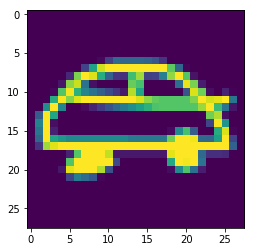

[1.6882738e-11, 2.1433974e-11, 5.010636e-11, 5.7670366e-09, 1.0] ['fork', 'crayon', 'feather', 'flashlight', 'carrot'] carrot


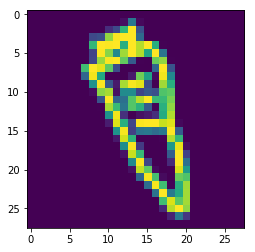

[3.6523108e-16, 4.4516473e-16, 9.8433868e-16, 2.016161e-14, 1.0] ['broom', 'fire hydrant', 'banana', 'crayon', 'cello'] cello


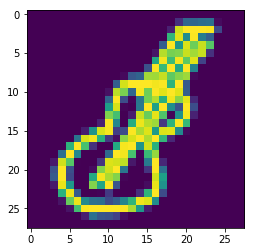

[4.3289075e-09, 4.7537942e-09, 2.4299976e-07, 6.2889444e-07, 0.99999917] ['calculator', 'anvil', 'calendar', 'dresser', 'computer'] computer


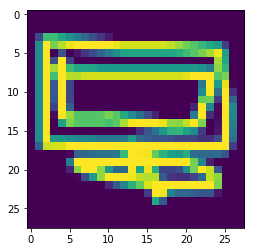

[4.7883373e-07, 1.5734799e-06, 7.2249595e-06, 5.4325508e-05, 0.99993503] ['eraser', 'calendar', 'couch', 'basket', 'computer'] computer


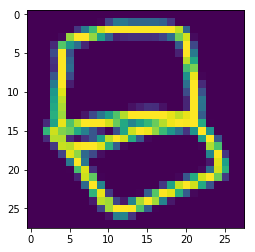

[0.0068526254, 0.0085784206, 0.017937133, 0.15519218, 0.80174702] ['dragon', 'bear', 'crab', 'dog', 'cat'] cat


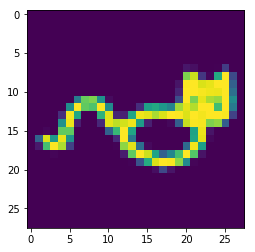

[0.061326697, 0.079117499, 0.092445336, 0.096477769, 0.10643875] ['campfire', 'chandelier', 'broom', 'foot', 'blueberry'] chandelier


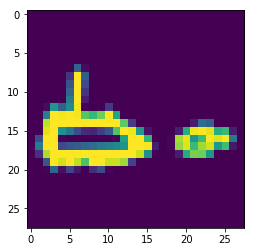

[0.0013199778, 0.019744109, 0.058219858, 0.063746557, 0.85319775] ['baseball', 'donut', 'flying saucer', 'compass', 'clock'] clock


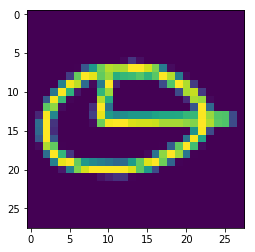

[7.7161394e-06, 5.5282322e-05, 0.00021897095, 0.020417053, 0.97926885] ['coffee cup', 'couch', 'bread', 'cloud', 'flying saucer'] cloud


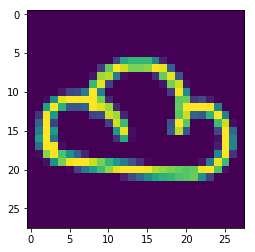

[2.1101253e-06, 2.9217634e-05, 5.0509356e-05, 0.00051274261, 0.99940181] ['bottlecap', 'car', 'flying saucer', 'brain', 'cloud'] cloud


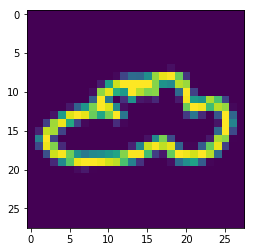

[1.0281566e-10, 2.7664979e-10, 3.2313793e-10, 0.23986401, 0.76013595] ['ambulance', 'anvil', 'drill', 'cup', 'coffee cup'] coffee cup


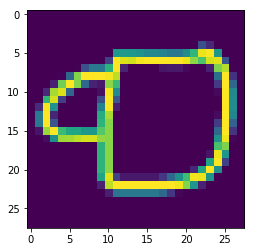

[3.2561528e-07, 6.7103866e-07, 0.011900249, 0.033778667, 0.95431978] ['alarm clock', 'blueberry', 'donut', 'clock', 'compass'] compass


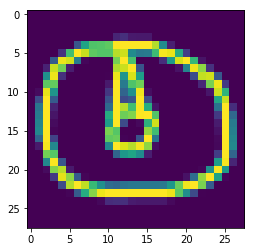

[2.2265268e-11, 8.226551e-09, 1.1043336e-08, 8.356364e-07, 0.99999917] ['dog', 'blueberry', 'bear', 'face', 'cookie'] cookie


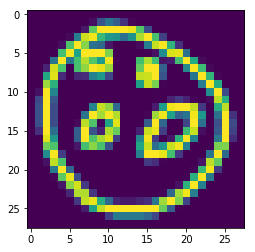

[2.1074316e-06, 3.377766e-06, 3.8716084e-06, 5.8816263e-06, 0.999982] ['basket', 'birthday cake', 'dresser', 'computer', 'couch'] couch


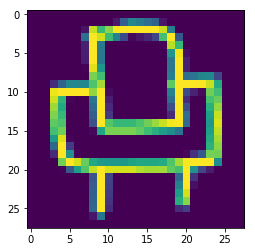

[9.659434e-07, 3.0033102e-06, 0.010415912, 0.27291748, 0.71666211] ['fence', 'eraser', 'dumbbell', 'bed', 'couch'] couch


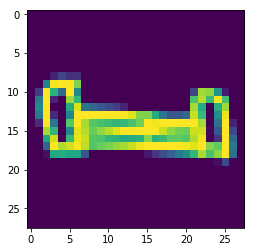

[0.00017662485, 0.00023878431, 0.00094187743, 0.0012246802, 0.99716276] ['elephant', 'crocodile', 'cat', 'dog', 'cow'] cow


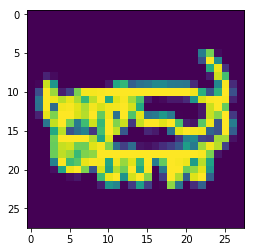

[3.8262712e-18, 5.9114781e-18, 6.8598187e-17, 2.5799195e-14, 1.0] ['dog', 'bear', 'drums', 'cat', 'crab'] crab


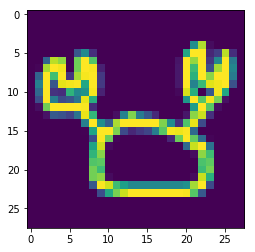

[1.1443868e-07, 6.0724534e-07, 1.0441331e-06, 1.975669e-06, 0.99999619] ['fire hydrant', 'eraser', 'candle', 'finger', 'crayon'] crayon


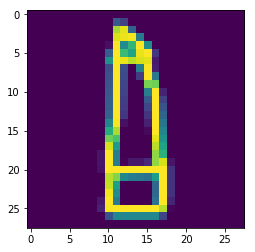

[0.0080430619, 0.037086185, 0.10509982, 0.25390935, 0.59026796] ['fish', 'airplane', 'crocodile', 'dolphin', 'dragon'] crocodile


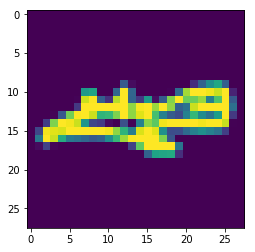

[0.026750859, 0.039736189, 0.22301282, 0.24590977, 0.27245143] ['foot', 'canoe', 'crocodile', 'baseball bat', 'dolphin'] crocodile


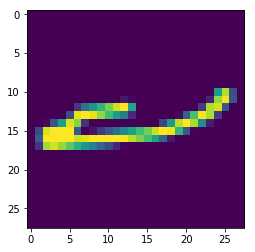

[1.354408e-10, 2.3496891e-10, 3.599987e-10, 4.5838261e-10, 1.0] ['fish', 'cake', 'envelope', 'birthday cake', 'crown'] crown


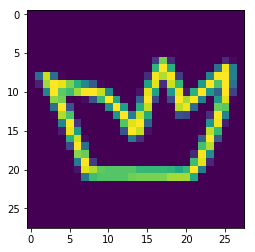

[8.2605953e-07, 1.2607898e-06, 5.3489319e-05, 0.00064515421, 0.99929881] ['basket', 'drums', 'bottlecap', 'coffee cup', 'cup'] cup


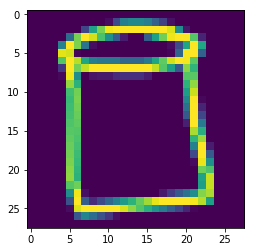

[6.4005719e-05, 7.6268043e-05, 9.765647e-05, 0.0008557862, 0.99881423] ['eraser', 'book', 'baseball', 'brain', 'diamond'] diamond


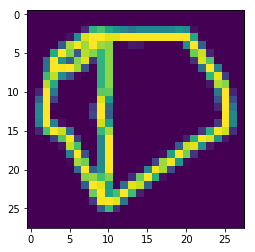

[0.011913044, 0.022206757, 0.052738152, 0.20006008, 0.65296215] ['cat', 'alarm clock', 'dog', 'blueberry', 'bear'] dog


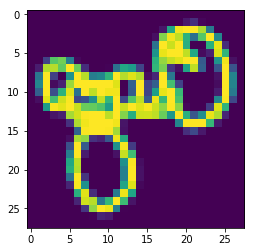

[0.003626944, 0.021861926, 0.026793456, 0.18418869, 0.75807935] ['crab', 'flamingo', 'dog', 'dragon', 'duck'] dog


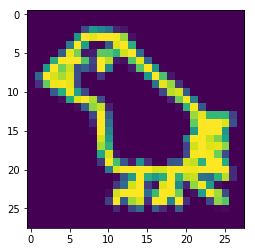

[2.153011e-10, 2.6278704e-10, 1.7975301e-09, 2.8061082e-09, 1.0] ['boomerang', 'crocodile', 'fish', 'airplane', 'dolphin'] dolphin


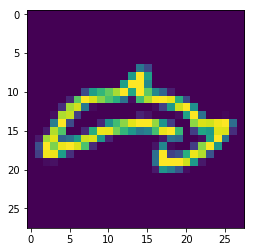

[6.0781286e-07, 6.7100996e-07, 4.5308016e-06, 5.0155804e-06, 0.99998808] ['compass', 'eye', 'bracelet', 'clock', 'donut'] donut


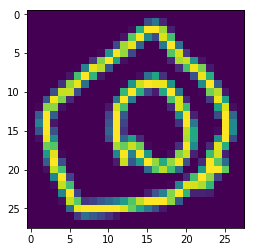

[0.0001028113, 0.00073459005, 0.0010631983, 0.0063153645, 0.99135816] ['duck', 'crocodile', 'airplane', 'angel', 'dragon'] dragon


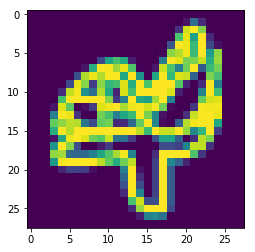

[3.0200724e-09, 3.4808856e-09, 4.5985676e-08, 2.9708161e-07, 0.99999976] ['computer', 'cup', 'calendar', 'book', 'dresser'] dresser


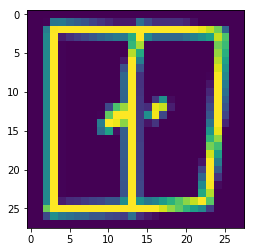

[5.3325931e-07, 3.1938553e-06, 3.9076667e-06, 1.165535e-05, 0.99997878] ['fire hydrant', 'binoculars', 'couch', 'calendar', 'dresser'] dresser


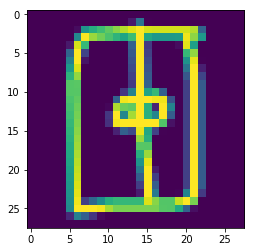

[3.7784437e-07, 1.5827218e-06, 3.9342863e-06, 0.043016359, 0.95697767] ['dolphin', 'flamingo', 'dragon', 'drill', 'duck'] drill


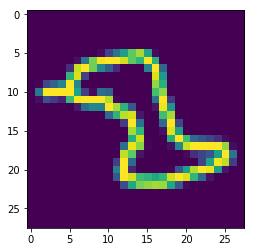

[0.00085984345, 0.0096899699, 0.086853743, 0.24023801, 0.66197491] ['foot', 'banana', 'boomerang', 'elbow', 'duck'] duck


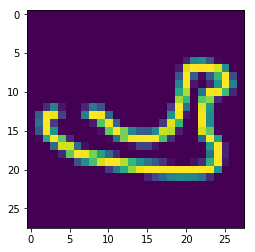

[0.014934485, 0.12782727, 0.14833774, 0.20698136, 0.42978534] ['bulldozer', 'binoculars', 'bicycle', 'eyeglasses', 'dumbbell'] dumbbell


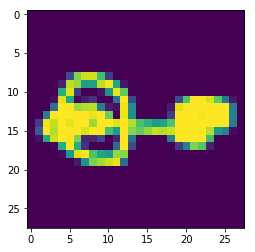

[0.00064051762, 0.00074557518, 0.00079168088, 0.00087242003, 0.99519122] ['donut', 'baseball bat', 'flip flops', 'boomerang', 'ear'] ear


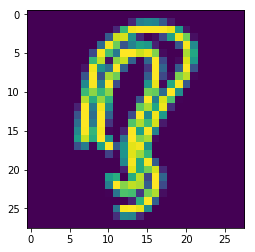

[4.2904805e-05, 8.8486107e-05, 0.00053237379, 0.0037797589, 0.99552059] ['diamond', 'dolphin', 'foot', 'boomerang', 'elbow'] elbow


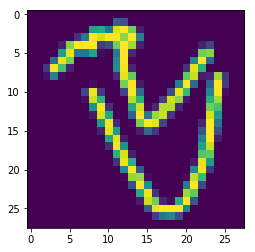

[0.02765473, 0.040941339, 0.054866716, 0.19616471, 0.63724399] ['cow', 'dragon', 'bear', 'dog', 'elephant'] elephant


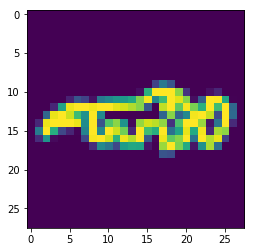

[0.011304378, 0.02462223, 0.028322529, 0.27741382, 0.62864304] ['flying saucer', 'crocodile', 'bread', 'canoe', 'eraser'] eraser


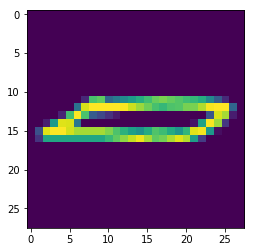

[1.6390318e-08, 5.2857356e-08, 9.0097764e-08, 1.6615255e-07, 0.99999964] ['ant', 'crab', 'blueberry', 'bee', 'eye'] eye


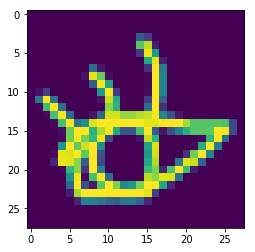

[8.2075555e-09, 5.3796543e-07, 8.152503e-07, 1.5311359e-06, 0.99999714] ['dumbbell', 'bowtie', 'drums', 'binoculars', 'eyeglasses'] eyeglasses


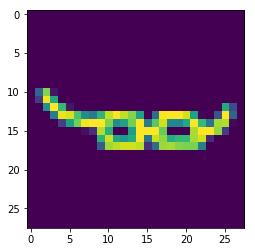

[3.46952e-12, 2.8162622e-10, 6.4482103e-10, 2.4823688e-09, 1.0] ['compass', 'cookie', 'dog', 'beard', 'face'] face


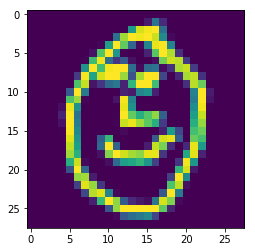

[1.4106624e-07, 1.0166169e-06, 2.2600755e-06, 1.7281276e-05, 0.99997914] ['cookie', 'bear', 'beard', 'dog', 'face'] face


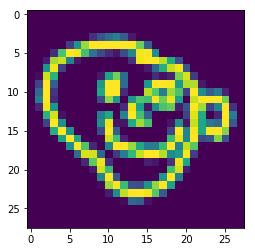

[0.0021588921, 0.0033433016, 0.012745162, 0.017566932, 0.96110576] ['flower', 'diamond', 'basketball', 'brain', 'fan'] fan


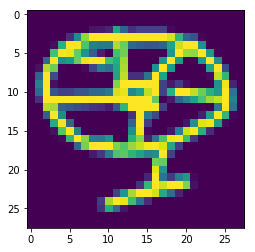

[4.7258339e-09, 5.2408682e-09, 2.2170006e-08, 4.8422754e-07, 0.99999952] ['banana', 'cello', 'flower', 'carrot', 'feather'] feather


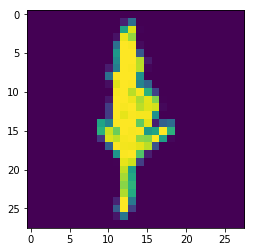

[1.3457282e-06, 3.5525818e-06, 2.2298131e-05, 5.0646333e-05, 0.9999212] ['crayon', 'calendar', 'crown', 'bread', 'fence'] fence


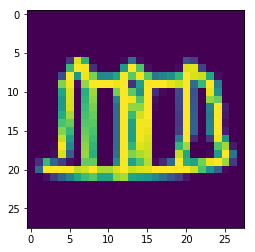

[6.4530563e-09, 1.5002948e-08, 6.4963075e-08, 4.4966432e-06, 0.99999547] ['crayon', 'fire hydrant', 'cactus', 'flip flops', 'finger'] finger


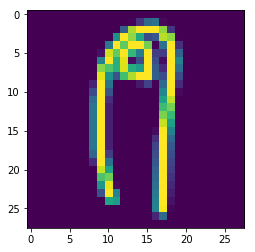

[2.870865e-06, 5.9023064e-06, 1.4463652e-05, 6.5554173e-05, 0.99990797] ['broom', 'baseball bat', 'feather', 'crayon', 'finger'] finger


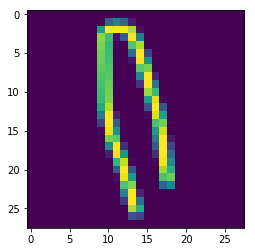

[5.1450733e-13, 8.8969462e-13, 2.3206515e-12, 5.3130985e-12, 1.0] ['bottlecap', 'cup', 'cactus', 'candle', 'fire hydrant'] fire hydrant


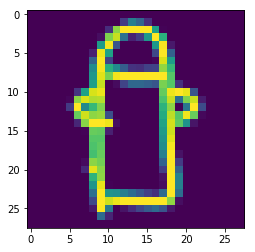

[2.0520662e-05, 0.00017670399, 0.00085770024, 0.0021836944, 0.99673283] ['alarm clock', 'campfire', 'brain', 'barn', 'fireplace'] fireplace


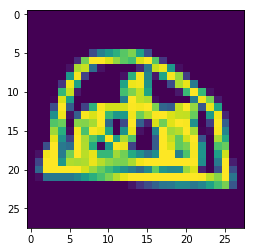

[0.0053049028, 0.035509061, 0.3032957, 0.32308081, 0.3322891] ['car', 'ambulance', 'firetruck', 'bus', 'bus'] firetruck


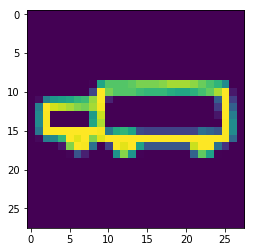

[3.5738759e-15, 1.8738634e-14, 9.013363e-13, 3.9509143e-07, 0.99999964] ['bowtie', 'canoe', 'baseball bat', 'dolphin', 'fish'] fish


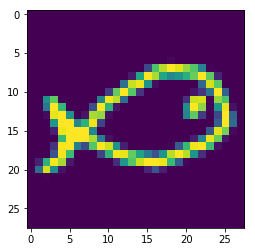

[0.0061280741, 0.012616008, 0.055653505, 0.35531607, 0.54038978] ['dolphin', 'crocodile', 'dragon', 'bowtie', 'fish'] fish


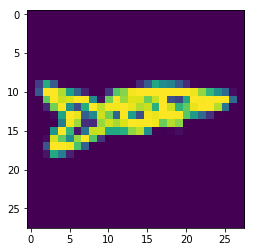

[1.0546236e-12, 2.7677428e-11, 5.287395e-10, 1.5412703e-05, 0.99998462] ['dragon', 'camel', 'dog', 'duck', 'flamingo'] flamingo


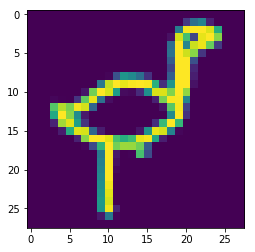

[1.8831045e-10, 3.0748357e-10, 2.0004531e-09, 1.2844372e-07, 0.99999988] ['bandage', 'fire hydrant', 'carrot', 'cannon', 'flashlight'] flashlight


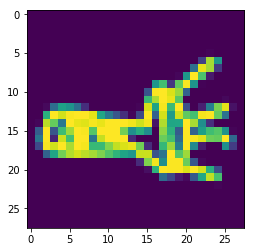

[0.003772506, 0.004280488, 0.019161126, 0.025211144, 0.93885273] ['bottlecap', 'ear', 'bracelet', 'beard', 'flip flops'] flip flops


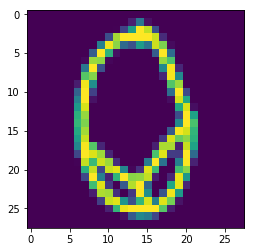

[0.00012798102, 0.00028758025, 0.00033172648, 0.037169222, 0.9618504] ['flamingo', 'fire hydrant', 'drill', 'floor lamp', 'axe'] floor lamp


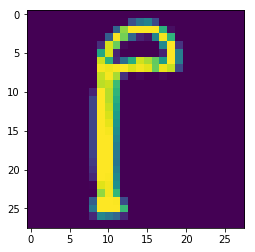

[2.7355218e-20, 1.1039577e-19, 3.4304997e-19, 5.8307461e-16, 1.0] ['bear', 'blueberry', 'bracelet', 'fan', 'flower'] flower


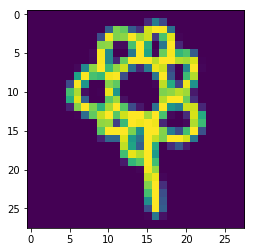

[2.1362403e-05, 3.0406196e-05, 0.00011250976, 0.005153121, 0.99462765] ['alarm clock', 'bracelet', 'brain', 'bottlecap', 'flying saucer'] flying saucer


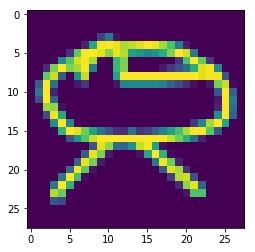

[1.4298356e-06, 1.8195395e-06, 3.8594662e-06, 0.00031400024, 0.99967718] ['coffee cup', 'cup', 'bathtub', 'elbow', 'foot'] foot


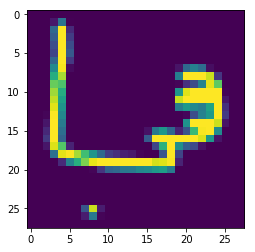

[1.3886208e-07, 1.2792539e-05, 1.5009489e-05, 6.6667279e-05, 0.99990535] ['crayon', 'flashlight', 'candle', 'carrot', 'fork'] fork


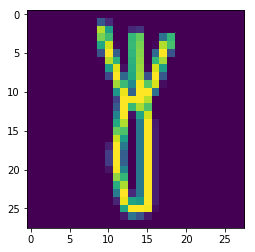

[1.7806445e-09, 1.9558579e-08, 3.1775059e-08, 5.2882376e-07, 0.9999994] ['axe', 'flashlight', 'candle', 'carrot', 'fork'] fork


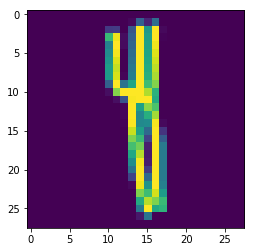

In [9]:
# plot those that are correct
for i in range(1900,500000/2,2000):
    if np.argmax(y_test[i]) in pred2[i//100] :
        plt.imshow(x_test[i,:,:,0]);
        print sorted(pred[i//100])[-5:],map( lambda x : classes[x],pred2[i//100]),classes[np.argmax(y_test[i])]
        plt.show()